<a href="https://colab.research.google.com/github/thiagorainmaker77/teste_2/blob/master/ml_exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#manipular dados
import pandas as pd


#extrator de caracteristicas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#classificadores
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


# regular fator de aleatoriedade
import numpy as np

#avaliador de resultados
from sklearn.metrics import confusion_matrix, f1_score, classification_report


#ferramenta de gráficos
import seaborn as sb


In [0]:
#ignorar mensagens de warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# aleatoriedade
rng = np.random.RandomState(42)

In [0]:
#importanto datasets

uri_train  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/train.tsv'
uri_valid  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/valid.tsv'
uri_test  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/test.tsv'

    
df_train = pd.read_table(uri_train,
                             names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])

    
df_valid = pd.read_table(uri_valid,
                             names =['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])


df_test = pd.read_table(uri_test, sep='\t', 
                            names =['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue']) 

#concatenando treinamento e validação
df = pd.concat([df_train, df_valid])

In [6]:
#vetorizando

countV = CountVectorizer()
countV.fit_transform(df['statement'])


tfidf = TfidfVectorizer()
tfidf.fit_transform(df['statement'])

<11524x12872 sparse matrix of type '<class 'numpy.float64'>'
	with 186721 stored elements in Compressed Sparse Row format>

#MultinomialNB

## multi-classes


In [7]:
mnb = MultinomialNB()
mnb.fit(tfidf.transform(df['statement']), df['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
respostas = mnb.predict(tfidf.transform(df_test['statement']))

In [9]:
retorno = f1_score(df_test['label'],respostas, average='micro')

print(retorno)

0.2612470402525651


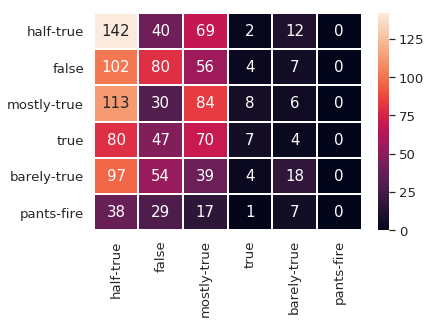

In [10]:
labels = [ 'half-true', 'false' , 'mostly-true' , 'true' , 'barely-true' ,'pants-fire']
confusion = confusion_matrix(df_test['label'], respostas, labels)
    
df_cm = pd.DataFrame(confusion , labels, labels )
sb.set(font_scale=1.2)
sb.heatmap(df_cm, annot=True,annot_kws={"size": 15}, linewidths=1.0, fmt='g')

## transformando o problema em binário

In [0]:
def define_classe(x):
  retorno = 'true'
  if x  == 'false' or x == 'barely-true' or x == 'pants-fire':
    retorno = 'false'
  
  return retorno

In [0]:

df['classe'] = df.apply(lambda row: define_classe(row['label']), axis=1)

df_test['classe'] = df_test.apply(lambda row: define_classe(row['label']), axis=1)




In [0]:
df[['label', 'classe']]

In [91]:
mnb = MultinomialNB()
mnb.fit(tfidf.transform(df['statement']), df['classe'])
respostas = mnb.predict(tfidf.transform(df_test['statement']))

retorno = f1_score(df_test['classe'],respostas, average='micro')
print(retorno)


0.6219415943172849


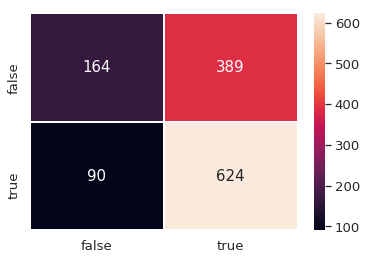

In [92]:
labels = [ 'false' ,  'true' ]
confusion = confusion_matrix(df_test['classe'], respostas, labels)
    
df_cm = pd.DataFrame(confusion , labels, labels )
sb.set(font_scale=1.2)
sb.heatmap(df_cm, annot=True,annot_kws={"size": 15}, linewidths=1.0, fmt='g')

#ExtraTrees

In [93]:
mnb = ExtraTreesClassifier()
mnb.fit(tfidf.transform(df['statement']), df['label'])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
respostas = mnb.predict(tfidf.transform(df_test['statement']))

retorno = f1_score(df_test['label'],respostas, average='micro')

print(retorno)

0.2296764009471192


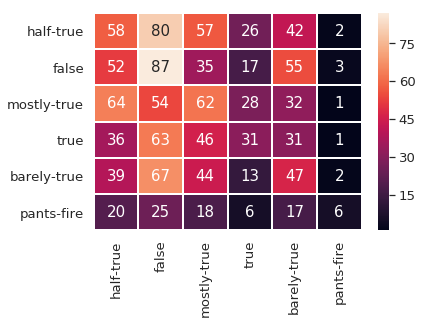

In [96]:
labels = [ 'half-true', 'false' , 'mostly-true' , 'true' , 'barely-true' ,'pants-fire']
confusion = confusion_matrix(df_test['label'], respostas, labels)
    
df_cm = pd.DataFrame(confusion , labels, labels )
sb.set(font_scale=1.2)
sb.heatmap(df_cm, annot=True,annot_kws={"size": 15}, linewidths=1.0, fmt='g')

In [97]:
mnb = ExtraTreesClassifier()
mnb.fit(tfidf.transform(df['statement']), df['classe'])
respostas = mnb.predict(tfidf.transform(df_test['statement']))

retorno = f1_score(df_test['classe'],respostas, average='micro')
print(retorno)

0.601420678768745


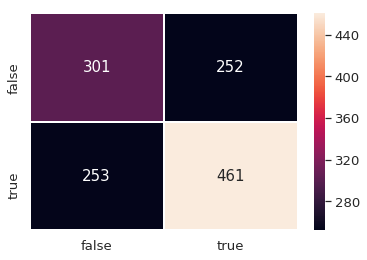

In [98]:
labels = [ 'false' ,  'true' ]
confusion = confusion_matrix(df_test['classe'], respostas, labels)
    
df_cm = pd.DataFrame(confusion , labels, labels )
sb.set(font_scale=1.2)
sb.heatmap(df_cm, annot=True,annot_kws={"size": 15}, linewidths=1.0, fmt='g')